# 6.5: Unsupervised Machine Learning: Clustering

## Importing librairies, path and data

## Applying the elbow technique

## K-means clustering

## Importing librairies, path and data

In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [117]:
# Defining the path 
path = r'C:\Users\salmi\Desktop\achievement 6'

In [119]:
new_happiness_data = pd.read_csv(os.path.join(path, 'Data sets', 'Prepared Data Happiness', 'new_happiness_data_only_avg_factors_update_ex_3.csv'), index_col = False)

In [121]:
# This option ensures the graphs created are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [123]:
new_happiness_data

,Unnamed: 0.1,Unnamed: 0,Country,Averaged Happiness Score,Averaged Economy,Averaged Family,Averaged Health,Averaged Freedom,Averaged Generosity,Averaged Trust,Wealth Category
0,0,2,Denmark,7.5460,1.396729,1.358481,0.865249,0.625959,0.318876,0.429374,Rich
1,1,3,Norway,7.5410,1.519381,1.330458,0.873333,0.638049,0.328990,0.343951,Rich
2,2,5,Finland,7.5378,1.356960,1.331049,0.873836,0.621536,0.217783,0.398474,Rich
3,3,0,Switzerland,7.5114,1.472164,1.337221,0.928318,0.620642,0.277432,0.379763,Rich
4,4,1,Iceland,7.5110,1.386523,1.398688,0.917744,0.618035,0.419124,0.140145,Rich
...,...,...,...,...,...,...,...,...,...,...,...
135,135,135,Afghanistan,3.5128,0.357113,0.331588,0.254707,0.117924,0.267730,0.058094,Poor
136,136,129,Tanzania,3.4660,0.439777,0.940300,0.396732,0.386880,0.311749,0.083699,Poor
137,137,136,Rwanda,3.4386,0.322057,0.778422,0.417543,0.581611,0.226311,0.473468,Poor
138,138,138,Syria,3.2922,0.699109,0.339884,0.566281,0.081700,0.431285,0.159547,Middle


In [125]:
# Keeping only the necessary column

happiness_data_for_clust = new_happiness_data[['Averaged Happiness Score', 'Averaged Economy', 'Averaged Family', 
'Averaged Health', 'Averaged Freedom', 'Averaged Trust']]

In [127]:
happiness_data_for_clust

,Averaged Happiness Score,Averaged Economy,Averaged Family,Averaged Health,Averaged Freedom,Averaged Trust
0,7.5460,1.396729,1.358481,0.865249,0.625959,0.429374
1,7.5410,1.519381,1.330458,0.873333,0.638049,0.343951
2,7.5378,1.356960,1.331049,0.873836,0.621536,0.398474
3,7.5114,1.472164,1.337221,0.928318,0.620642,0.379763
4,7.5110,1.386523,1.398688,0.917744,0.618035,0.140145
...,...,...,...,...,...,...
135,3.5128,0.357113,0.331588,0.254707,0.117924,0.058094
136,3.4660,0.439777,0.940300,0.396732,0.386880,0.083699
137,3.4386,0.322057,0.778422,0.417543,0.581611,0.473468
138,3.2922,0.699109,0.339884,0.566281,0.081700,0.159547


In [129]:
happiness_data_for_clust.shape

(140, 6)

## Applying the elbow technique

In [153]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [155]:
score = [kmeans[i].fit(happiness_data_for_clust).score(happiness_data_for_clust) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\salmi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\salmi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\salmi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\salmi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[-214.00692416813018,
 -76.13421201360066,
 -40.20900771987103,
 -31.313929369602956,
 -23.717495584302206,
 -20.49137000955579,
 -17.937471283361162,
 -16.795113516031297,
 -15.746094257443279]

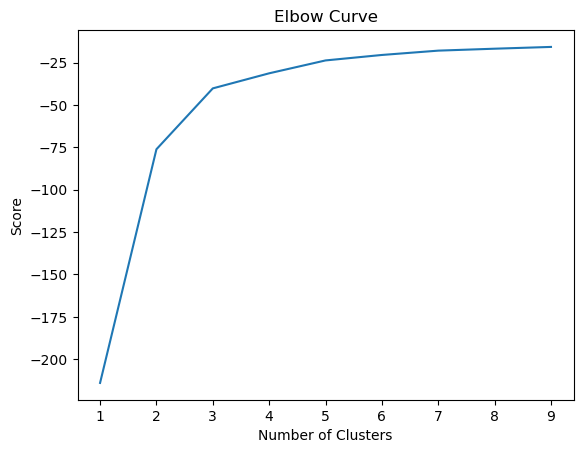

In [156]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Here the maximal count for the cluster is 3

## K-means clustering

In [159]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [161]:
# To avoid data warning 
os.environ["OMP_NUM_THREADS"] = "1"

In [165]:
# Fit the k-means object to the data.

kmeans.fit(happiness_data_for_clust)

C:\Users\salmi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\salmi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [167]:
happiness_data_for_clust['clusters'] = kmeans.fit_predict(happiness_data_for_clust)

C:\Users\salmi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\salmi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\salmi\AppData\Local\Temp\ipykernel_26916\2351149183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  happiness_data_for_clust['clusters'] = kmeans.fit_predict(happiness_data_for_clust)


In [169]:
happiness_data_for_clust.head()

,Averaged Happiness Score,Averaged Economy,Averaged Family,Averaged Health,Averaged Freedom,Averaged Trust,clusters
0,7.5460,1.396729,1.358481,0.865249,0.625959,0.429374,0
1,7.5410,1.519381,1.330458,0.873333,0.638049,0.343951,0
2,7.5378,1.356960,1.331049,0.873836,0.621536,0.398474,0
3,7.5114,1.472164,1.337221,0.928318,0.620642,0.379763,0
4,7.5110,1.386523,1.398688,0.917744,0.618035,0.140145,0


In [171]:
happiness_data_for_clust['clusters'].value_counts()

clusters
2    55
1    49
0    36
Name: count, dtype: int64

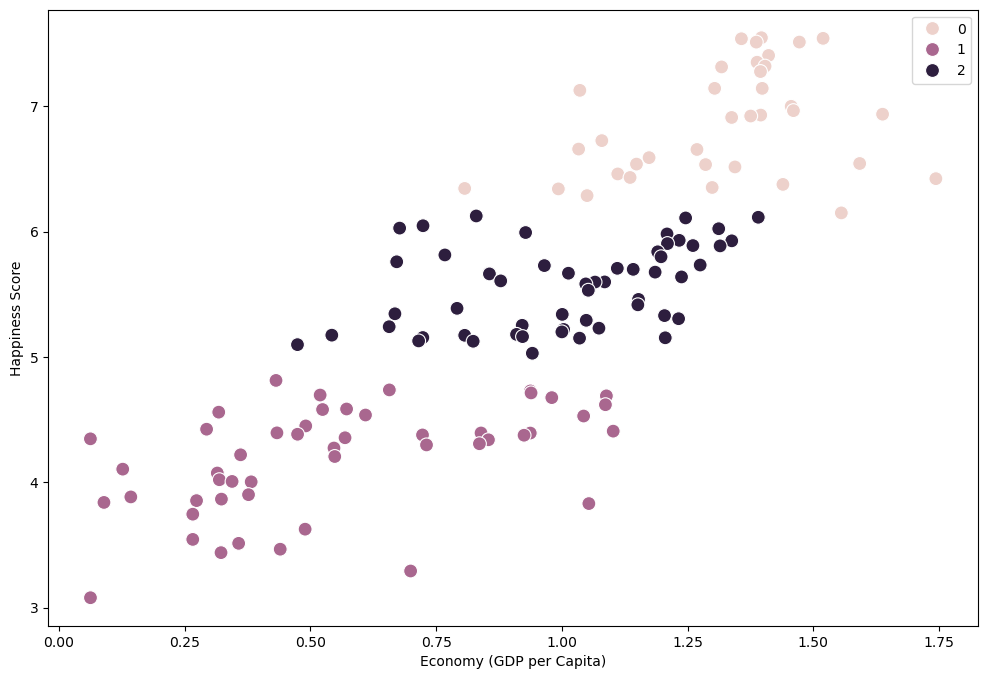

In [191]:
# Plot the clusters for the "Averaged Economy" and "Averaged Happiness Score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=happiness_data_for_clust['Averaged Economy'], y=happiness_data_for_clust['Averaged Happiness Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Economy (GDP per Capita)') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

The K-means algorithm identified three distinct clusters within the dataset. These clusters provide meaningful insights, particularly highlighting the relationship between economic factors and happiness scores. For instance, countries in the pink cluster, which have better economic conditions, tend to have higher happiness scores. However, the data also reveals that countries with similar economic conditions can have significantly different happiness scores. This observation underscores the multifaceted nature of happiness, suggesting that while the economy is a major driver, it is not the sole factor influencing happiness.

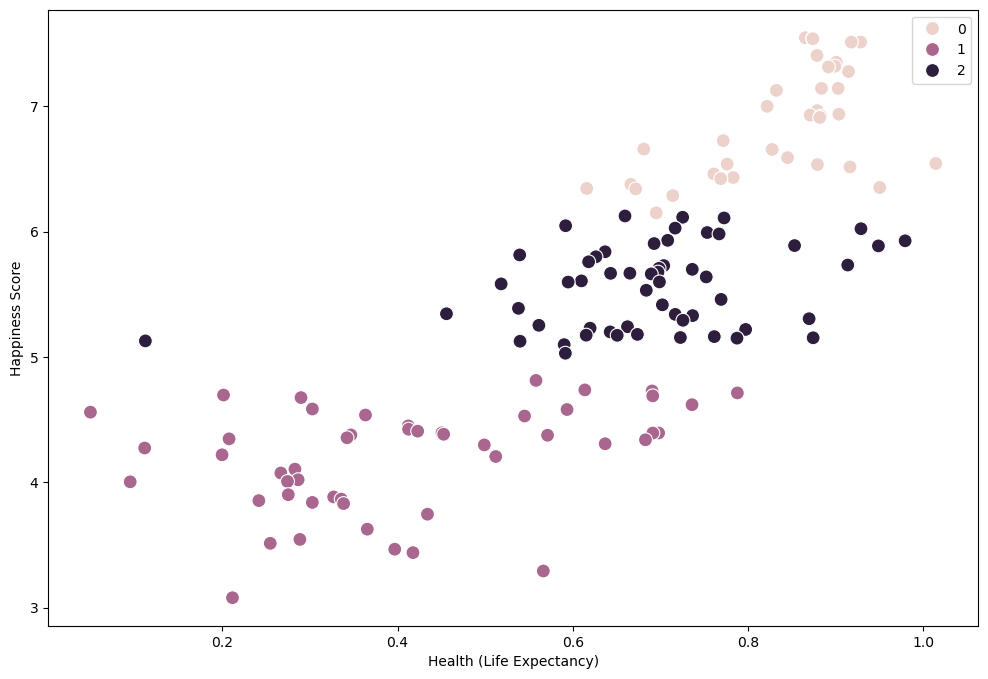

In [179]:
# Plot the clusters for the "Averaged Health" and "Averaged Happiness Score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=happiness_data_for_clust['Averaged Health'], y=happiness_data_for_clust['Averaged Happiness Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Health (Life Expectancy)') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

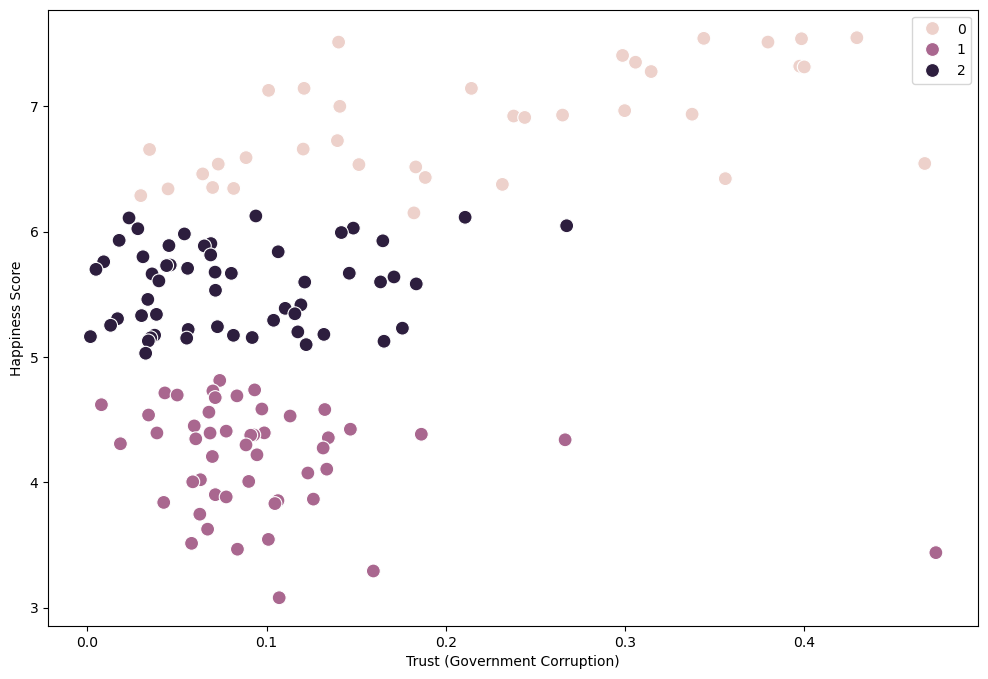

In [181]:
# Plot the clusters for the "Averaged Trust" and "Averaged Happiness Score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=happiness_data_for_clust['Averaged Trust'], y=happiness_data_for_clust['Averaged Happiness Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Trust (Government Corruption)') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

The K-Means algorithm also revealed a relationship between Trust and Happiness scores. However, the clusters, particularly the dark purple and purple ones, appear to overlap significantly. This suggests that trust in government does not play a substantial role in determining the happiness of a country in this dataset. The close positioning of these clusters indicates that other factors may be more influential in shaping overall happiness, highlighting that trust, while important, is not a primary determinant in the context of this analysis.

In [185]:
# Ensure to work with a copy to avoid SettingWithCopyWarning
happiness_data_for_clust = happiness_data_for_clust.copy()

# Set the color based on the cluster values
happiness_data_for_clust.loc[happiness_data_for_clust['clusters'] == 2, 'cluster'] = 'dark purple'
happiness_data_for_clust.loc[happiness_data_for_clust['clusters'] == 1, 'cluster'] = 'purple'
happiness_data_for_clust.loc[happiness_data_for_clust['clusters'] == 0, 'cluster'] = 'pink'

In [187]:
happiness_data_for_clust.groupby('cluster').agg({'Averaged Economy':['mean', 'median'], 
                         'Averaged Health':['mean', 'median'], 
                         'Averaged Trust':['mean', 'median'],
                          'Averaged Happiness Score':['mean', 'median']})

Averaged Economy           Averaged Health            \
                        mean    median            mean    median   
cluster                                                            
dark purple         1.004852  1.035062        0.687894  0.697091   
pink                1.319607  1.366179        0.837128  0.873584   
purple              0.552546  0.490572        0.408828  0.365440   

            Averaged Trust           Averaged Happiness Score          
                      mean    median                     mean  median  
cluster                                                                
dark purple       0.083133  0.068884                 5.559673  5.5980  
pink              0.218784  0.201388                 6.869350  6.9157  
purple            0.097362  0.083699                 4.193490  4.3388

1. Dark Purple Cluster: This cluster has lower average economy, health, and trust scores compared to the pink cluster but higher than the purple cluster. Their happiness scores are moderate.
   
2. Pink Cluster: This cluster exhibits the highest average economy, health, and trust scores, indicating a relatively better socio-economic status, and the highest happiness scores.
   
3. Purple Cluster: This cluster has the lowest scores across all metrics, indicating potentially the lowest socio-economic status and lowest happiness scores.




By identifying these clusters, the model can be utilized to develop predictive models for happiness scores. For instance:

Purple Cluster: States or international organizations could implement targeted policies to enhance general health or build trust in institutions. Improving these areas could potentially raise happiness levels in countries within this cluster.

Pink Cluster: Countries in this cluster already benefit from strong economic and health conditions. Efforts could focus on further enhancing other factors that influence happiness or maintaining the current high levels of economic stability to boost happiness even further.

In summary, these results provide valuable insights into which factors have the most significant impact on happiness and highlight where resources and efforts should be concentrated. By focusing on specific areas within each cluster, it is possible to develop tailored strategies aimed at increasing overall happiness across different regions.